# Gerak Parabola SciPy


Hai, mungkin dari video sebelumnya tentang gravitational slingshot kalian ada yang mau tau cara pakai SciPy buat nyelesain persamaan differensial. Di video kali ini aku mau nunjukin simulasi gerak parabola pakai SciPy. Langsung aja, pertama, untuk import-importnya terlebih dahulu.

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('dark_background')

## Gerak Parabola

Selanjutnya adalah untuk persamaan differensial gerak parabola itu sendiri. Urutan dari `y` yang kita buat bisa apa aja, tapi yang aku biasa pakai posisi x, kecepatan x, posisi y, kecepatan y. Jadi, y[0] adalah posisi x, y[1] kecepatan x, y[2] posisi y, y[3] kecepatan y.

Ingat kembali kalau turunan dari posisi adalah kecepatan, dan karena kita sudah tau kecepatan dari gerak parabola kita, kita tinggal taro y[1] atau kecepatan x untuk `y0a` atau turunan dari posisi x. 

Kalau masih tau, di sumbu x kecepatannya konstan (kalau mengabaikan gesekan dengan udara) jadi gak ada percepatan. Sehingga `y1a` atau turunan dari kecepatan di x nya adalah 0.

Selanjutnya untuk yang di y, turunan dari posisi y sama kayak di x karena sudah tau, `y2a` isinya adalah y[3].

Terakhir untuk percepatan di y, karena dipengaruhi sama gravitasi dengan gaya

$$F = mg$$

kita bisa dapatkan percepatannya dengan menggunakan hukum ke-2 Newton

$$ma = mg$$
$$a = g$$

dengan $g = 9.8$ m/s$^2$

In [3]:
def diff(t, y):
    y0a = y[1]
    y1a = 0
    y2a = y[3]
    y3a = -9.8

    return np.array([y0a, y1a, y2a, y3a])

Kita sudah punya persamaan differensial buat gerak parabola, sekarang kita coba buat nyelesain permasalahan template.

Budi menendang bola secepat 20 m/s dengan sudut 30 derajat dari tanah. Berapakah ketinggian maksimum bola dan jarak tempuh bola?

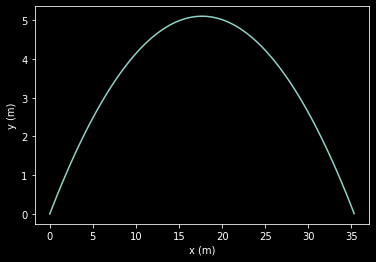

In [4]:
v0 = 20
angle = np.radians(30)
sol = solve_ivp(diff, [0, 20], [0, v0*np.cos(angle), 0, v0*np.sin(angle)], dense_output=True, rtol=1e-8)

t1 = np.linspace(0, 2.04, 100)
y1 = sol.sol(t1)

plt.plot(y1[0], y1[2])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

In [5]:
print(max(y1[0]))
print(max(y1[2]))

35.333836474405096
5.101561065197428


Tapi, apa hasil ini benar sesuai teori? Kalau masih ingat, persamaan buat gerak parabola adalah $x = v_xt$ untuk di sumbu x dan $y = v_yt + \frac{1}{2}gt^2$. Kita coba dapatkan nilai x dan y untuk waktu dari 0 sampai jatuh ke tanah dan kita bandingkan hasilnya dengan yang dari SciPy.

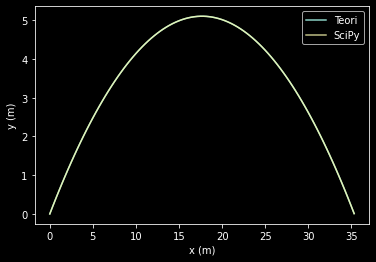

In [6]:
x = v0 * np.cos(angle) * t1
y = v0 * np.sin(angle) * t1 + 1/2 * (-9.8) * t1**2

plt.plot(x, y, label="Teori")
plt.plot(y1[0], y1[2], label="SciPy", alpha=0.75)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.show()

Hasilnya persis sama, hasil SciPy ngehalangin hasil yang teori jadi agak kecampur.

Kita lihat satu-satu apa yang terjadi di sumbu x dan sumbu y. Pertama yang sumbu x, kita lihat kalau jaraknya berubah secara linear atau lurus. Ini tadi yang kita buat percepatannya 0 jadi kecepatannya konstan dan karena kecepatannya konstan perubahan jaraknya berubah beraturan dan inilah yang dinamakan gerak lurus beraturan.


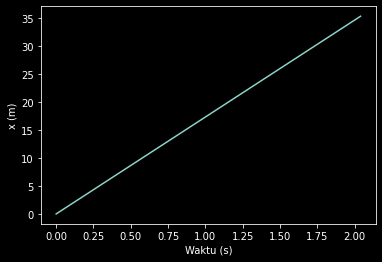

In [7]:
plt.plot(t1, y1[0])
plt.xlabel("Waktu (s)")
plt.ylabel("x (m)")
plt.show()

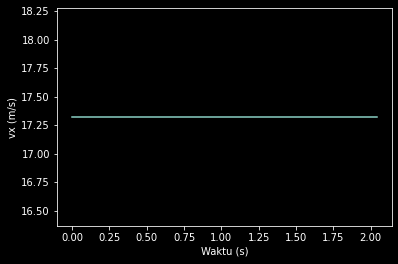

In [8]:
plt.plot(t1, y1[1])
plt.xlabel("Waktu (s)")
plt.ylabel("vx (m/s)")
plt.show()

Sedangkan di sumbu y, ini mirip gerak parabola yang barusan tapi jangan ketuker karena ini adalah jarak sumbu y sebagai fungsi dari waktu. Kita lihat posisinya berubah tapi tidak secara linear, hal ini karena ada percepatan yang mengubah kecepatannya yang membuat perubahan dari posisinya tidak sama setiap saat. Inilah yang dinamakan gerak lurus berubah beraturan.

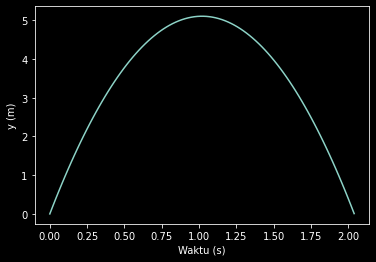

In [9]:
plt.plot(t1, y1[2])
plt.xlabel("Waktu (s)")
plt.ylabel("y (m)")
plt.show()

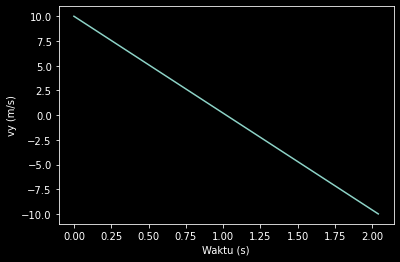

In [10]:
plt.plot(t1, y1[3])
plt.xlabel("Waktu (s)")
plt.ylabel("vy (m/s)")
plt.show()

## Gerak Parabola With Wind

Agak kurang seru kalau cuma gerak parabola aja, kita tambahkan sesuatu yang jarang dilihat di soal-soal. _Gaya gesek udara tidak diabaikan_ (dramatic sfx). Jangan syok, tapi ini persamaan buat gaya gesek udara

$$F_d = C_d\rho\frac{v^2A}{2}$$

Di sini $F_d$ itu simbol untuk gaya gesek, $C_d$ adalah koefisien gesek dari bendanya biasanya dapet dari eksperimen, $\rho$ itu rapat atau densitas dari medium gesek benda, dalam hal ini udara, $v$ itu kecepatan, dan $A$ itu luas penampang yang bergesek dengan mediumnya. Semoga gak salah... aku juga kurang paham. Tapi ini rumus dari NASA https://www.grc.nasa.gov/WWW/k-12/airplane/falling.html.

Tidak lupa kita buat persamaan differensialnya

$$\Sigma F = mg - C_d\rho\frac{v^2A}{2}$$

Karena kita $v$ dikuadratkan, kita kehilangan arah dari kecepatannya. Agar tidak hilang, kita kalikan multaknya dengan kecepatannya.

$$\Sigma F = mg - C_d\rho\frac{(|v|\times v)A}{2}$$

Dan terakhir, kita dapatkan percepatannya dengan hukum ke-2 Newton

$$a = g - C_d\rho\frac{(|v|\times v)A}{2m}$$

Sebelum lupa, ini percepatannya masih gabungan dari dua sumbu, x dan y, kita harus pisah terlebih dahulu.

$$a_x = - C_d\rho\frac{(|v\cos\theta|\times v\cos\theta)A}{2m}$$

$$a_y = g - C_d\rho\frac{(|v\sin\theta|\times v\sin\theta)A}{2m}$$

Karena di sumbu y ada gravitasi, kita masukkan ke dalam, berbeda dengan yang x tak punya unsur gravitasi.

Untuk contoh soal, kita buat sama dengan sebelumnya. Menendang bola dengan kecepatan 20 m/s dengan sudut 30 derajat dari tanah. Bolanya memiliki spesifikasi diameter 0.23 meter, berat 0.4 kilogram, koefisien geseknya 0.25 dari sini https://www.grc.nasa.gov/WWW/K-12/airplane/socdrag.html. Buat $\rho$ kita asumsikan di ketinggian air laut sekitar 1.217 kg/m$^3$.

Karena kita sudah punya diameter, kita bisa dapetin luas permukaan bola yang bergesek dengan udara, kita asumsikan 1/2 dari permukaannya. Rumus $4\pi r^2$ kita pakai buat cari luas permukaan bolanya terus kita bagi dua, hasilnya 0.083 m$^2$

In [11]:
g = -9.8
Cd = 0.25
rho = 1.217
A = 0.083
m = 0.4 

def diff(t, y):
    y0a = y[1]
    y1a = - Cd*rho*np.abs(y[1])*y[1]*A/(2*m)
    y2a = y[3]
    y3a = g - Cd*rho*np.abs(y[3])*y[3]*A/(2*m)

    return np.array([y0a, y1a, y2a, y3a])

In [12]:
v0 = 20
angle = np.radians(30)
sol = solve_ivp(diff, [0, 20], [0, v0*np.cos(angle), 0, v0*np.sin(angle)], dense_output=True, rtol=1e-8)

Ini hasil dari gerak parabola dengan efek gesekan udara. Kayak gak ada perubahan grafiknya, masih parabola, sama mungkin agak sedikit miring parabolanya. Biar lebih jelas kita sekalian lihat grafik yang awal barusan

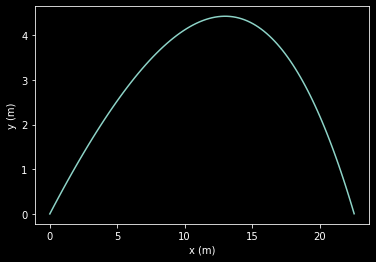

In [13]:
t2 = np.linspace(0, 1.9, 100)
y2 = sol.sol(t2)

plt.plot(y2[0], y2[2])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

In [14]:
print(max(y2[0]))
print(max(y2[2]))

22.56744474326929
4.422610633170267


Ini dia perbandingannya. Beda banget kan? Jaraknya semakin pendek, ketinggiannya juga semakin kecil. Kita liat perubahan posisi sama kecepatannya terhadap waktu satu-satu dibandingin juga sama versi tanpa gaya gesek udaranya.

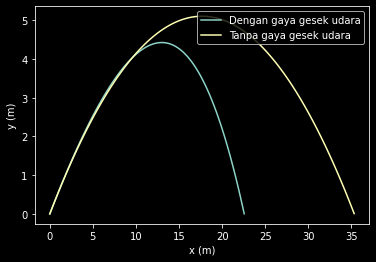

In [15]:
plt.plot(y2[0], y2[2], label="Dengan gaya gesek udara")
plt.plot(y1[0], y1[2], label="Tanpa gaya gesek udara")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend(loc="upper right")
plt.show()

Di sini, karena jarak tempuh gerak parabola yang lebih jauh, garis yang pakai gaya gesek udara lebih pendek. Juga, kalau dilihat dengan jeli, yang pakai gaya gesek udara lebih melengkung karena ada gaya gesek. 

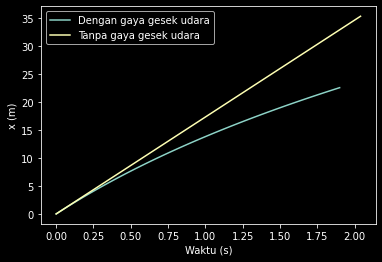

In [16]:
plt.plot(t2, y2[0], label="Dengan gaya gesek udara")
plt.plot(t1, y1[0], label="Tanpa gaya gesek udara")
plt.xlabel("Waktu (s)")
plt.ylabel("x (m)")
plt.legend(loc="upper left")
plt.show()

Untuk kecepatannya, semakin lama semakin melambat untuk yang pakai gaya gesek udara. Berbeda dengan yang konstan seperti tanpa gaya gesek udara.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


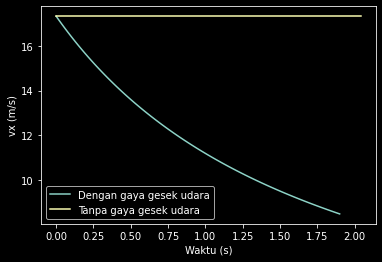

In [17]:
plt.plot(t2, y2[1], label="Dengan gaya gesek udara")
plt.plot(t1, y1[1], label="Tanpa gaya gesek udara")
plt.xlabel("Waktu (s)")
plt.ylabel("vx (m/s)")
plt.legend(loc="bottom left")
plt.show()

Buat grafik di sumbu y nya, mirip-mirip sama yang grafik di awal tadi.

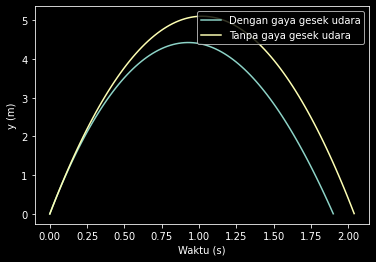

In [18]:
plt.plot(t2, y2[2], label="Dengan gaya gesek udara")
plt.plot(t1, y1[2], label="Tanpa gaya gesek udara")
plt.xlabel("Waktu (s)")
plt.ylabel("y (m)")
plt.legend(loc="upper right")
plt.show()

Buat kecepatannya lebih cepat berubah karena ketinggian maksimumnya berbeda.

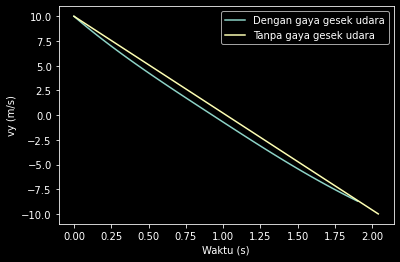

In [19]:
plt.plot(t2, y2[3], label="Dengan gaya gesek udara")
plt.plot(t1, y1[3], label="Tanpa gaya gesek udara")
plt.xlabel("Waktu (s)")
plt.ylabel("vy (m/s)")
plt.legend(loc="upper right")
plt.show()

Semoga membantu, kalau ada pertanyaan silahkan komen atau tanyakan langsung di Discord, bhay!